###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import the CSV data as Pandas DataFrame

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/mlproject/main/notebook/data/stud.csv')

# check top five row 

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of Data

In [5]:
df.shape

(1000, 8)

## Dataset Information

- Gender:sex of students -> (Male,Female)
- race_ethnicity: having group -> A,B,C,D,E
- parental_level_of_education:parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch: having lunch before test-> (Standard,reduced) 
- test_preparation_course : complete or not complete before test
- math_score
- reading_score
- writting_score

###  Data Checks to perform

- Mission value
- Dupliacted value
- Check datatype
- No of unique value in dataset features
- Check statistics of data set
- Check various categories present in the different categorical column

# Checking Missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Check duplicate Value

In [7]:
df.duplicated().sum()

0

# check the datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Check no of unique value in dataset features

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight

- Mean of all the numeric feature is very close to each other (66-69)
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# Exploring dataset

In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


# Define categorical and numerical featture

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [13]:
df['Total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average_score'] = df['Total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [14]:
math_full = df[df['math_score']==100]['Average_score'].count()
reading_full = df[df['reading_score']==100]['Average_score'].count()
writing_full = df[df['writing_score']==100]['Average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


# insight
- In math students performance is low
- In reading students performance is good

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

<Axes: xlabel='Average_score', ylabel='Count'>

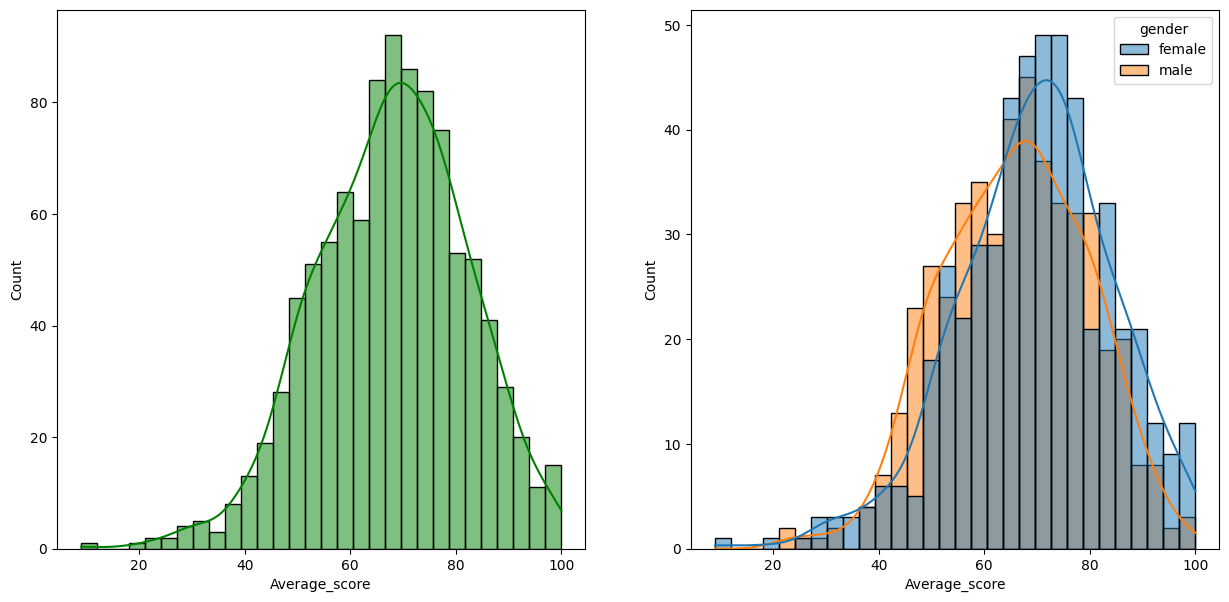

In [15]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,hue='gender')

# insight 
- Female perform good in the exam 

<Axes: xlabel='Average_score', ylabel='Count'>

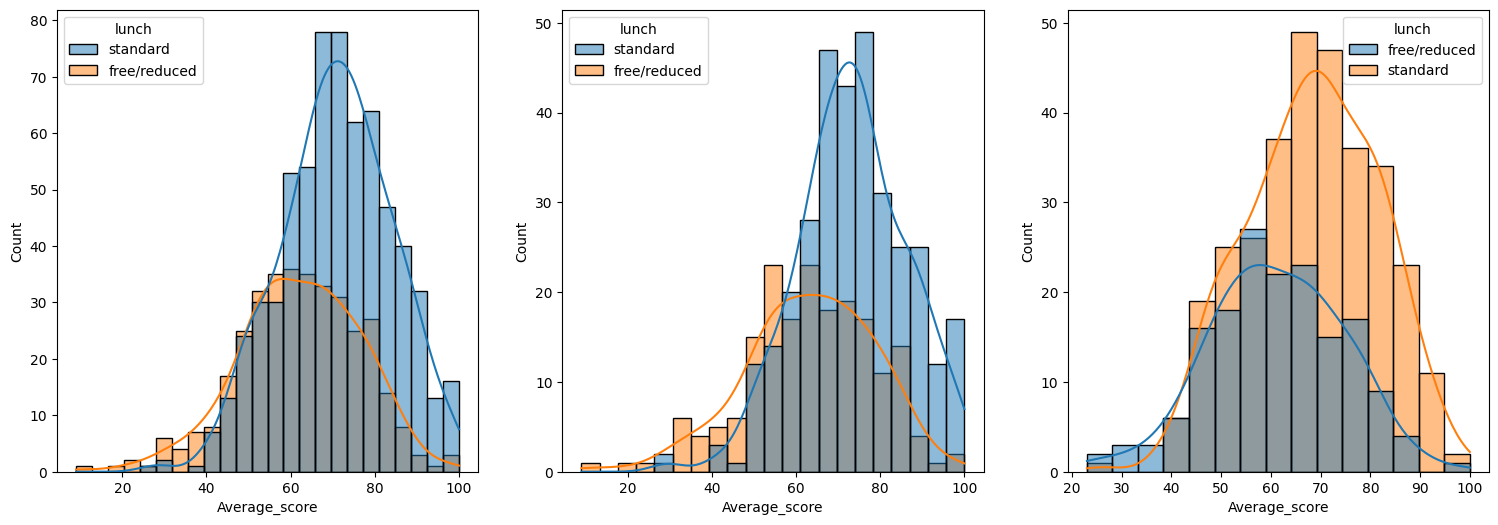

In [16]:
plt.figure(figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='Average_score',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='Average_score',hue='lunch',kde=True)

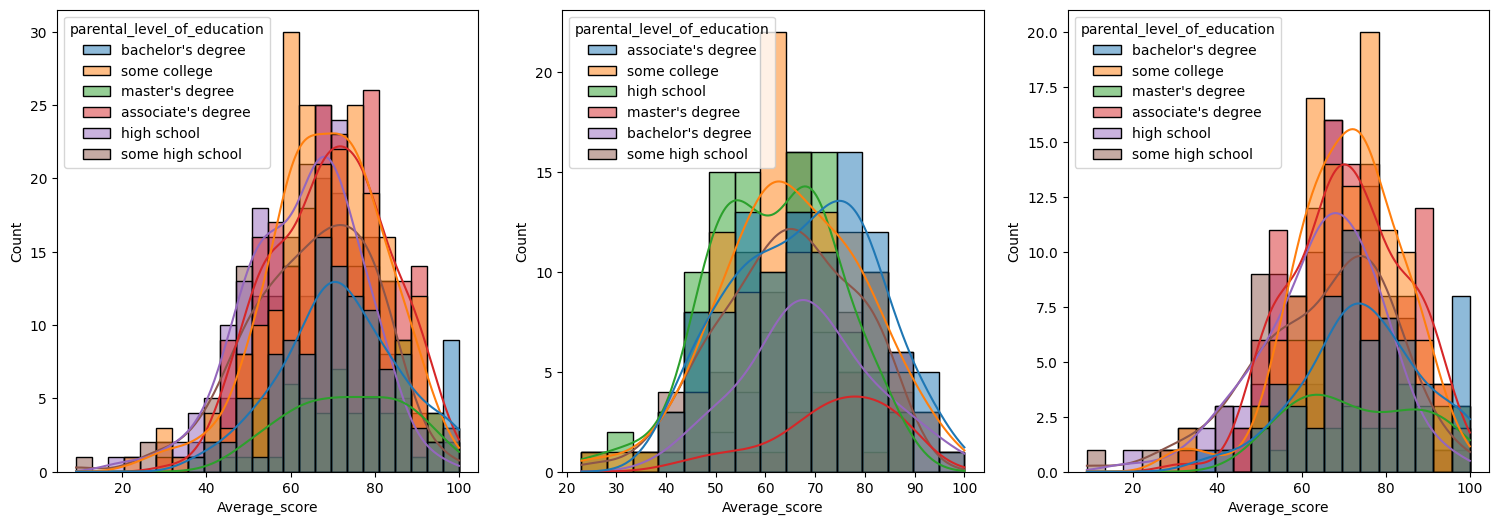

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.show()



#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

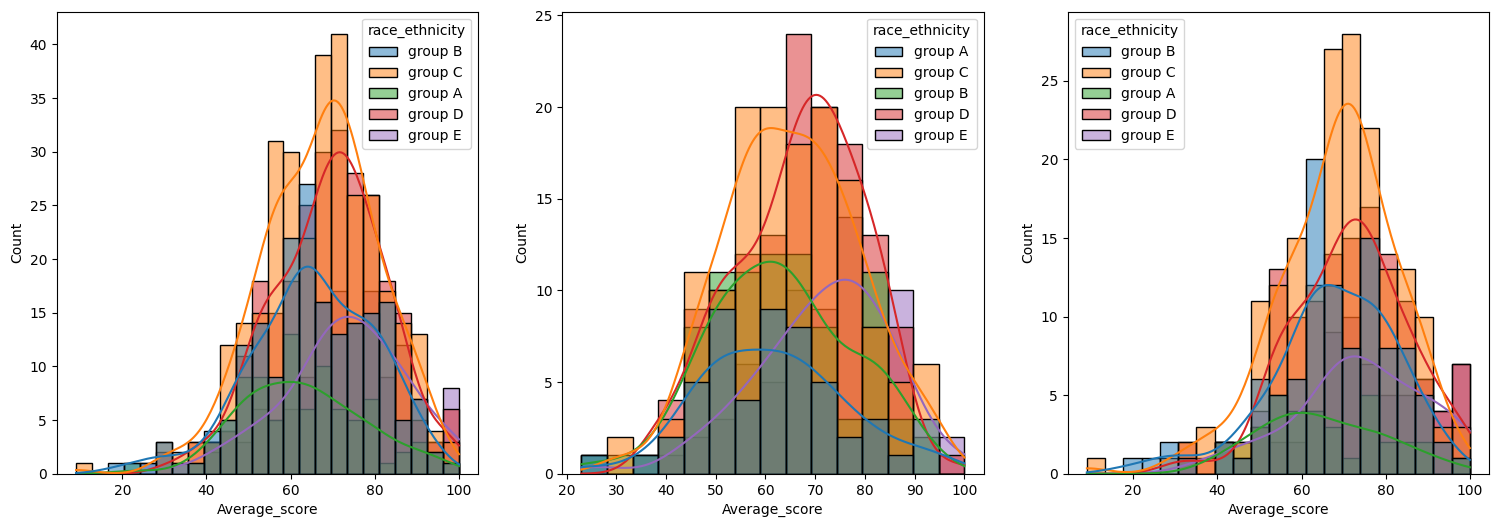

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.show()

#### insight
- students of group A and group B is poorly perform their is no impact on male and female student

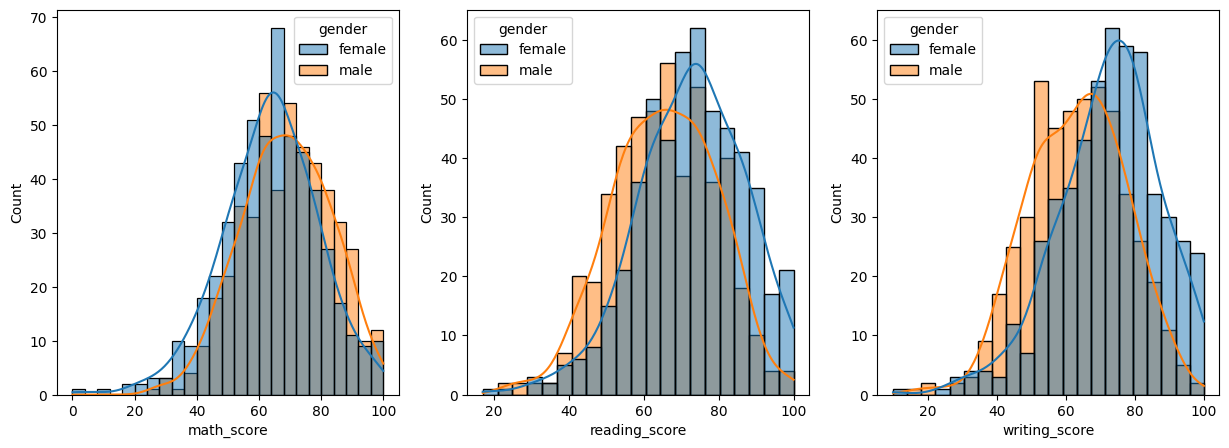

In [19]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
ax =sns.histplot(data=df,x='math_score',kde=True,hue='gender')
plt.subplot(132)
ax =sns.histplot(data=df,x='reading_score',kde=True,hue='gender')
plt.subplot(133)
ax =sns.histplot(data=df,x='writing_score',kde=True,hue='gender')
plt.show()

#### insight
- male score good in math but in reading and writing female are good

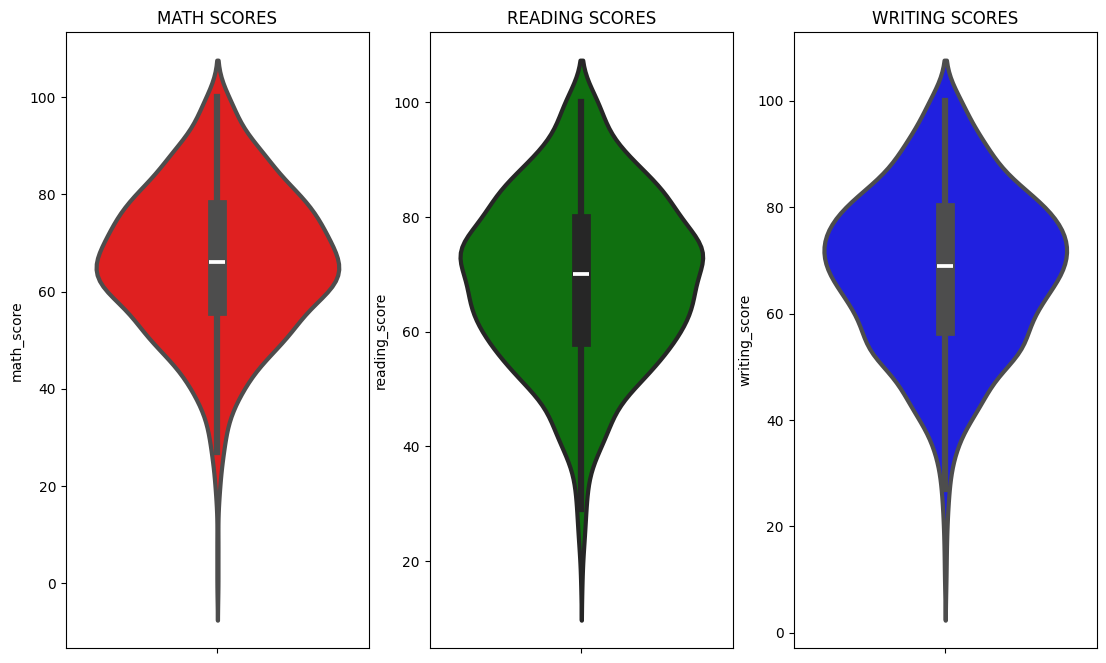

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### insight
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

In [21]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [22]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

(-1.25, 1.25, -1.25, 1.25)

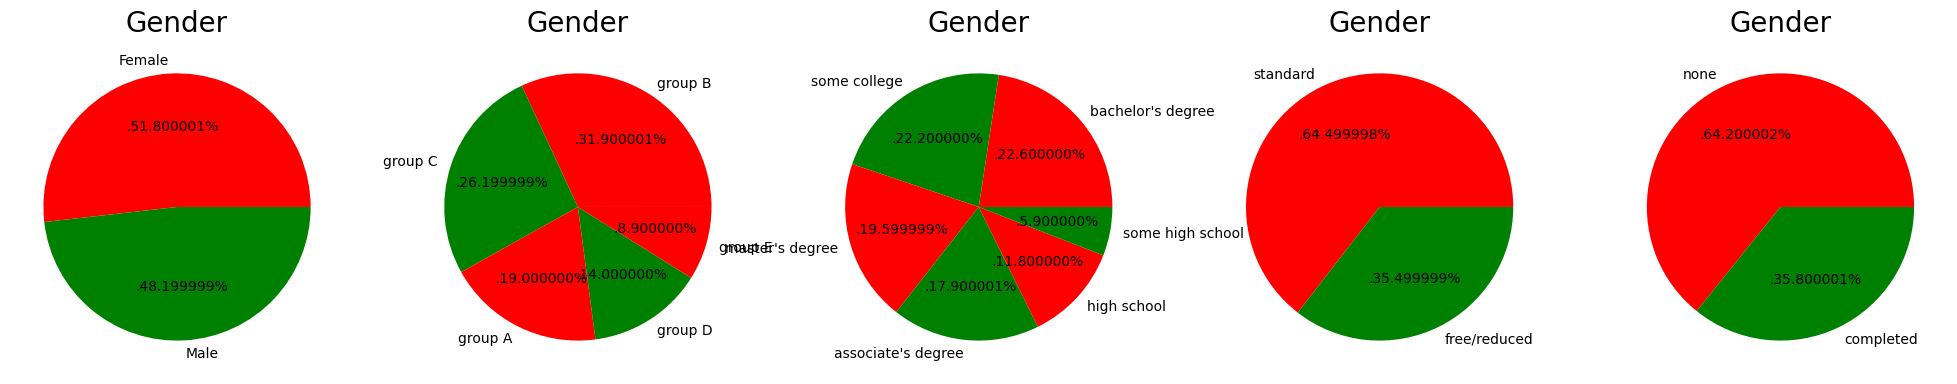

In [26]:
plt.figure(figsize=(25,6))
plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels= 'group B', 'group C', 'group A', 'group D', 'group E'
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(153)
size = df['parental_level_of_education'].value_counts()
labels= "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(154)
size = df['lunch'].value_counts()
labels= 'standard', 'free/reduced'
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(155)
size = df['test_preparation_course'].value_counts()
labels= 'none', 'completed'
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

#### insight

- Balance dataset  male and female are same
- no of student is greater in group c
- bacheler's and some college parental education are almost same
- most student having standard lunch before exam
- most of student not completer test series

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

(-1.25, 1.25, -1.25, 1.25)

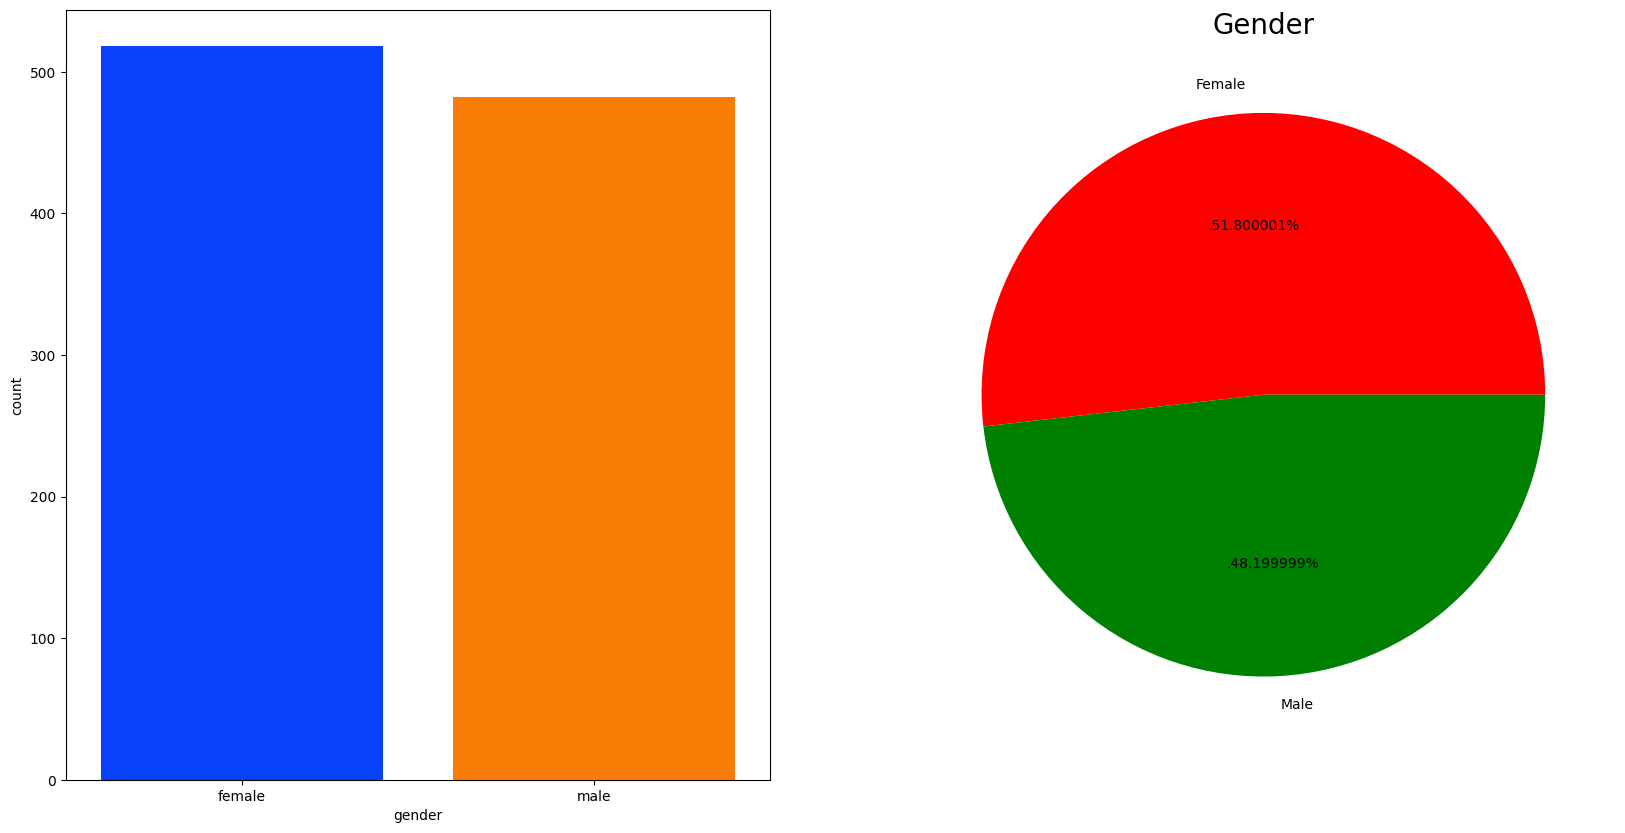

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
plt.pie(x = df['gender'].value_counts(), colors = ['red','green'], labels = ['Female', 'Male'],autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

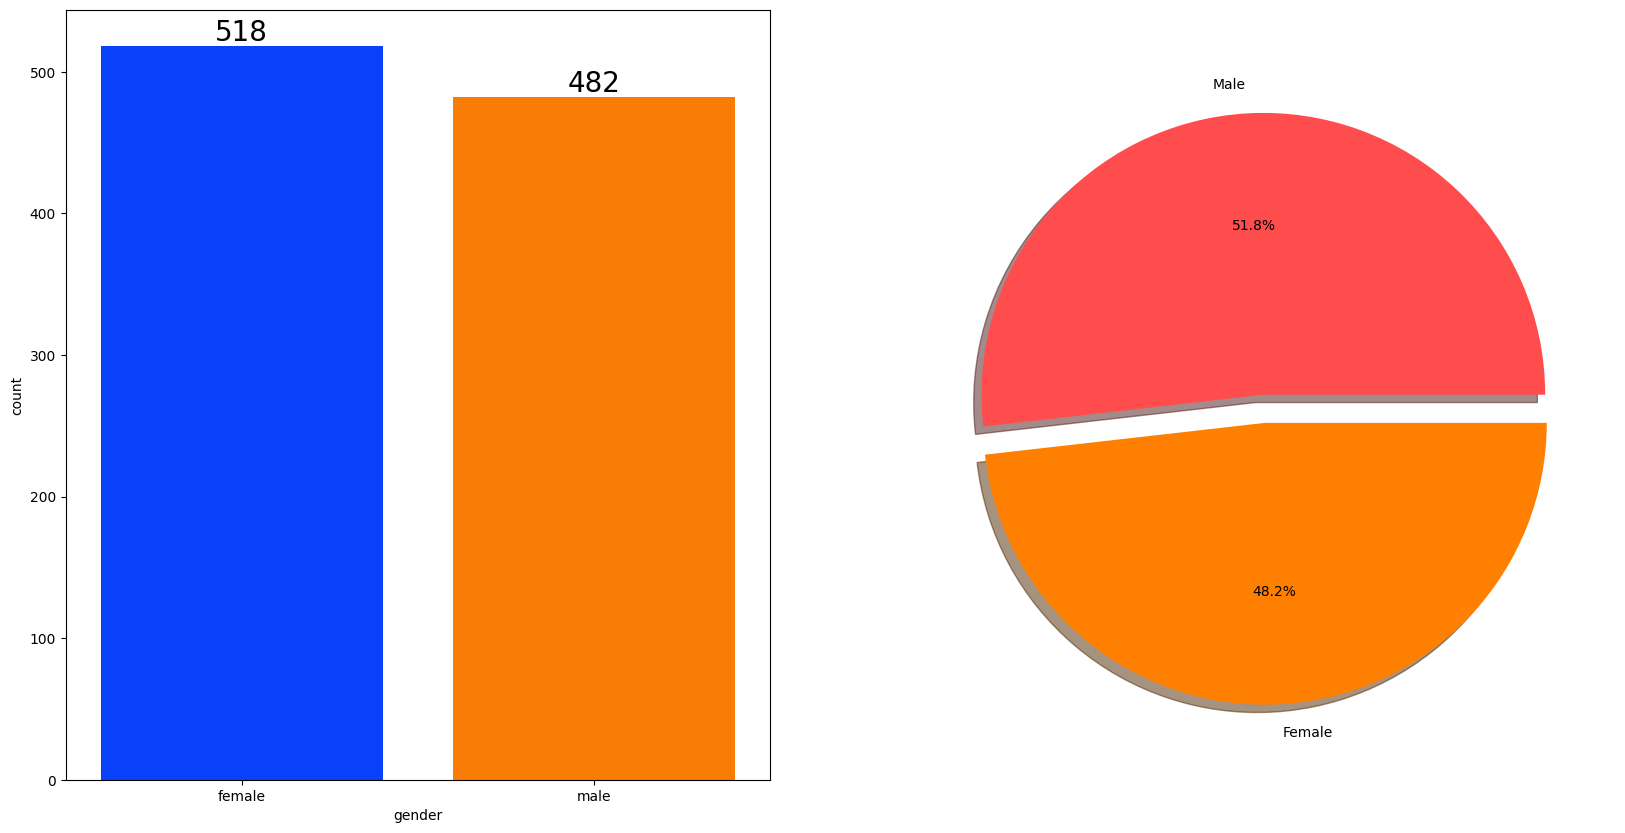

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [46]:
gender_group = df.groupby('gender')
gender_group.sum()

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


In [62]:
new_df = df[['gender','math_score', 'reading_score', 'writing_score','Total_score','Average_score']]

In [65]:
gender_group = new_df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


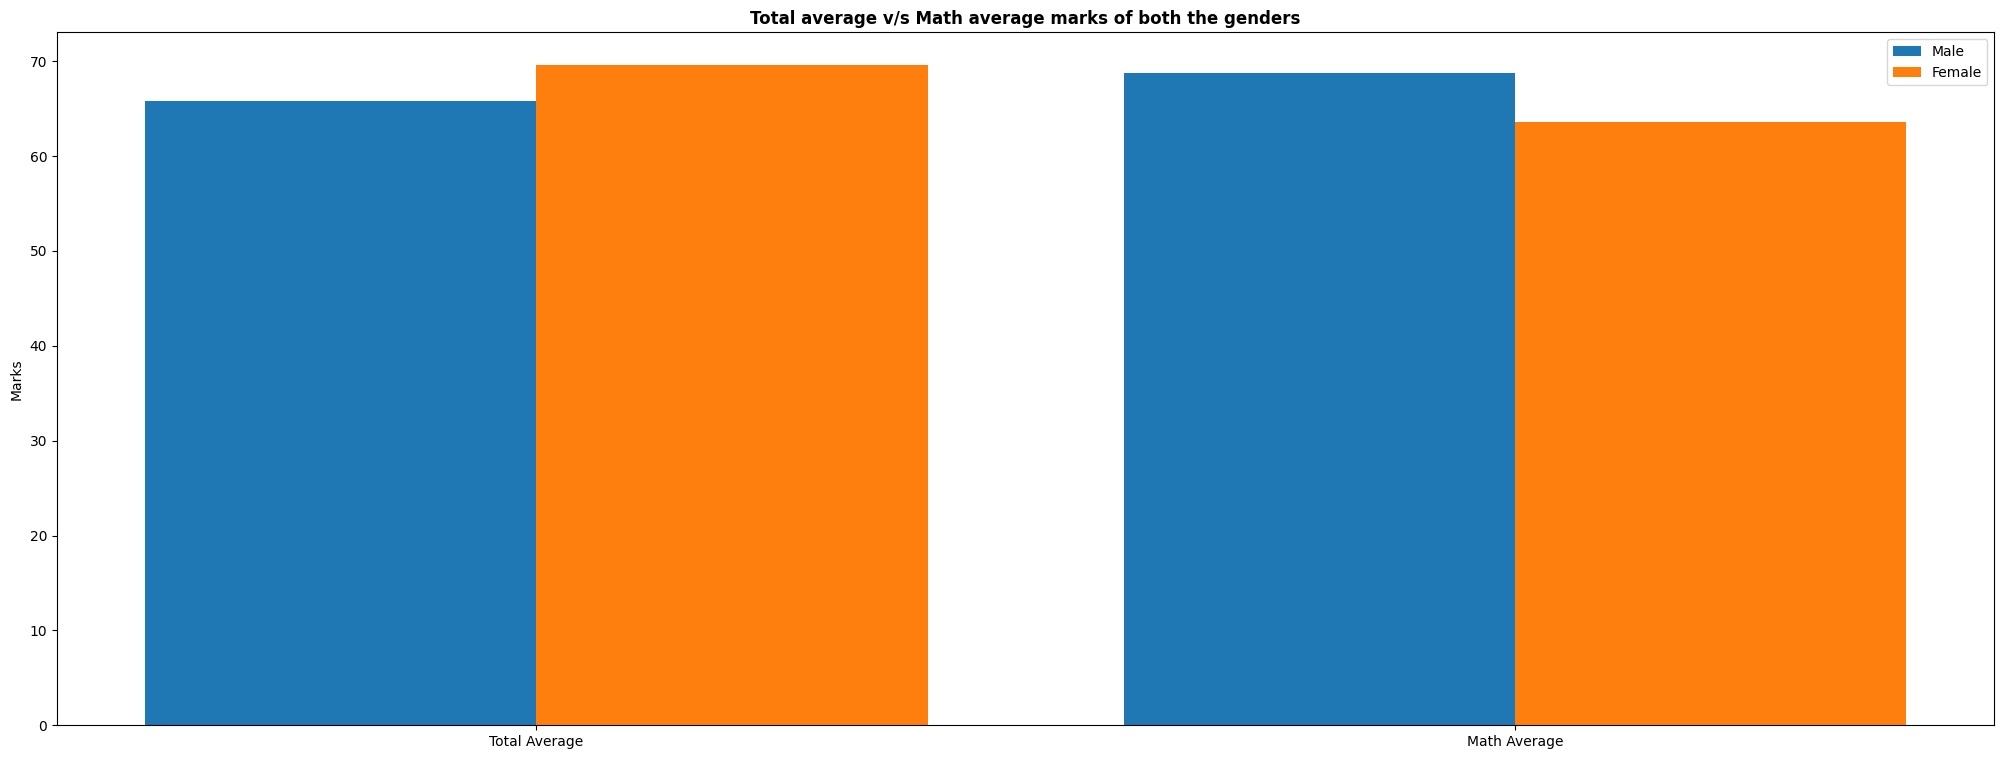

In [104]:
plt.figure(figsize=(25, 9))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


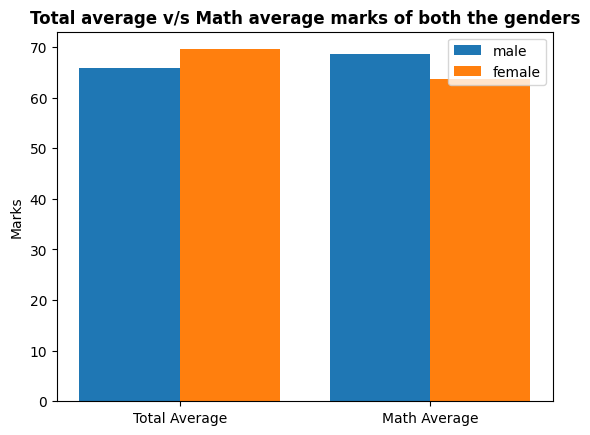

In [111]:

X = ['Total Average','Math Average']
X_axis = np.arange(len(X))

female_scores = [gender_group['Average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average_score'][1], gender_group['math_score'][1]]

plt.bar(X_axis - 0.2,male_scores,0.4,label='male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### insight
- female performace is good overall
- male are good in math

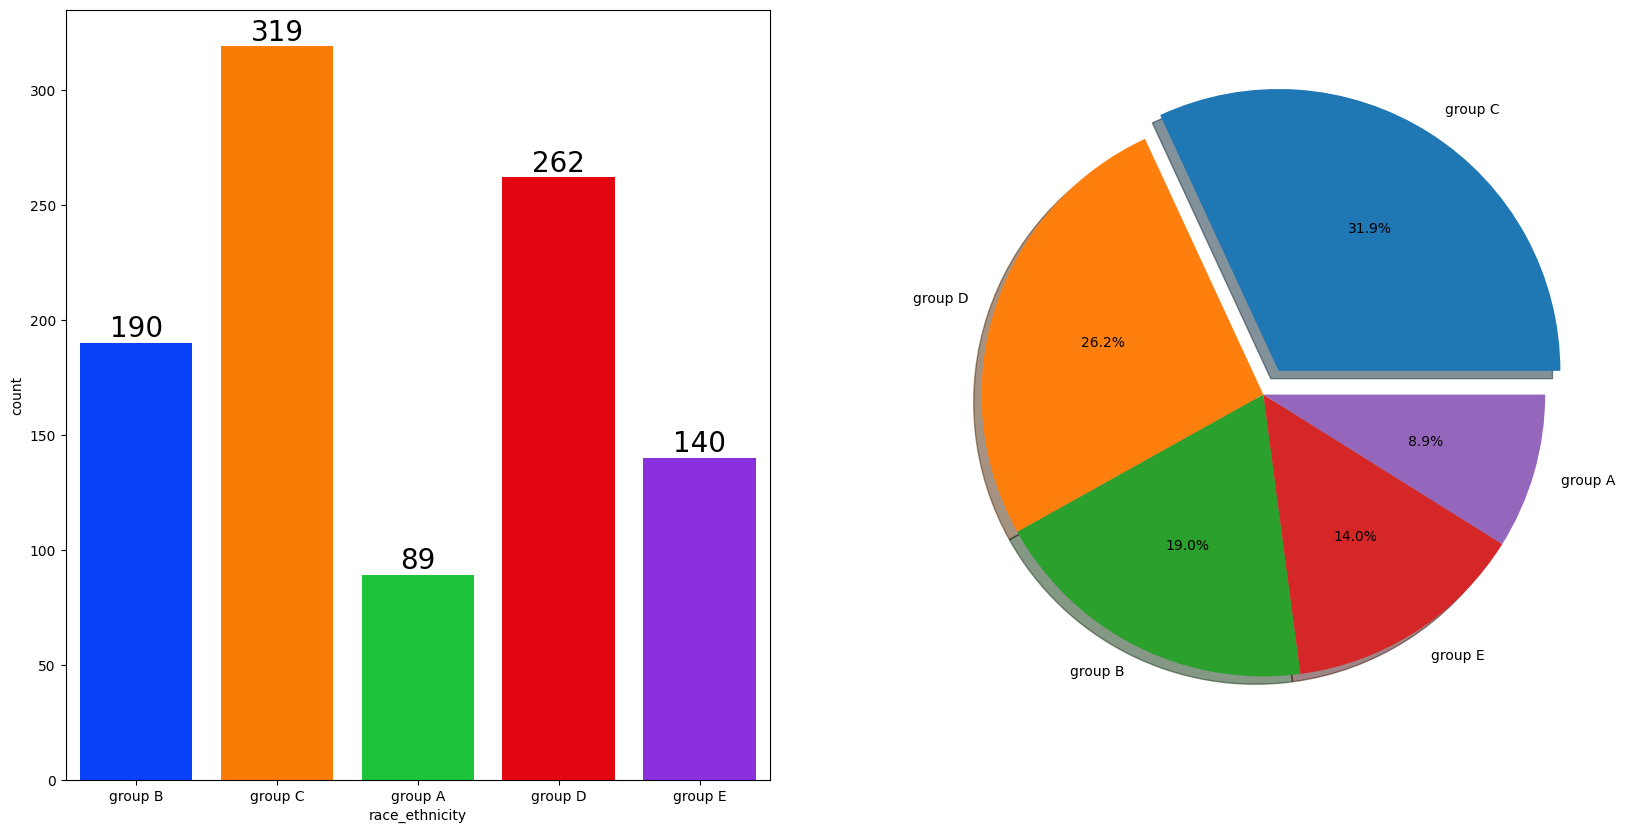

In [131]:
f,ax=plt.subplots(1,2,figsize=(20,10))
# f= plt.figure(figsize=(15,8))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20) 
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

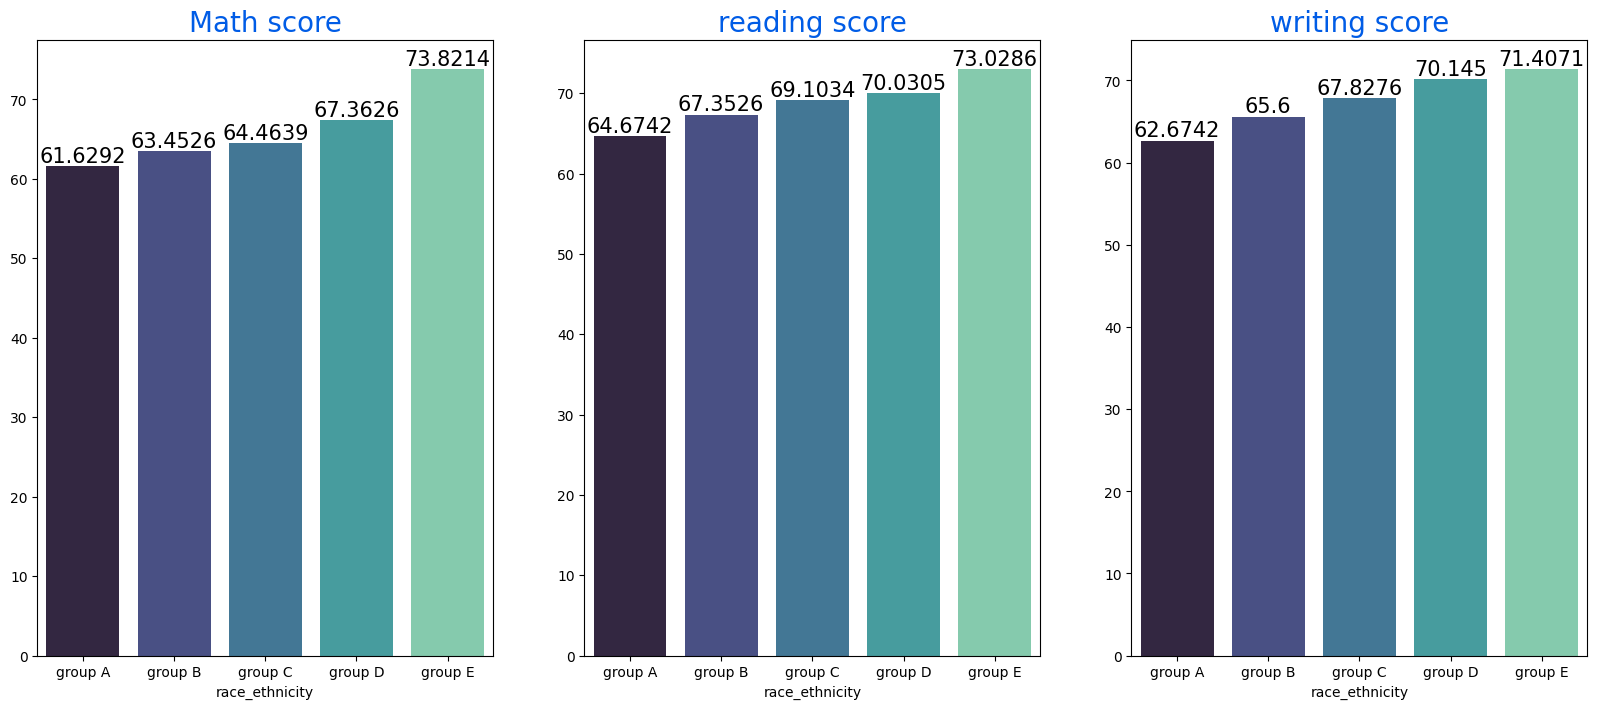

In [138]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### insight
- group e student are perform well

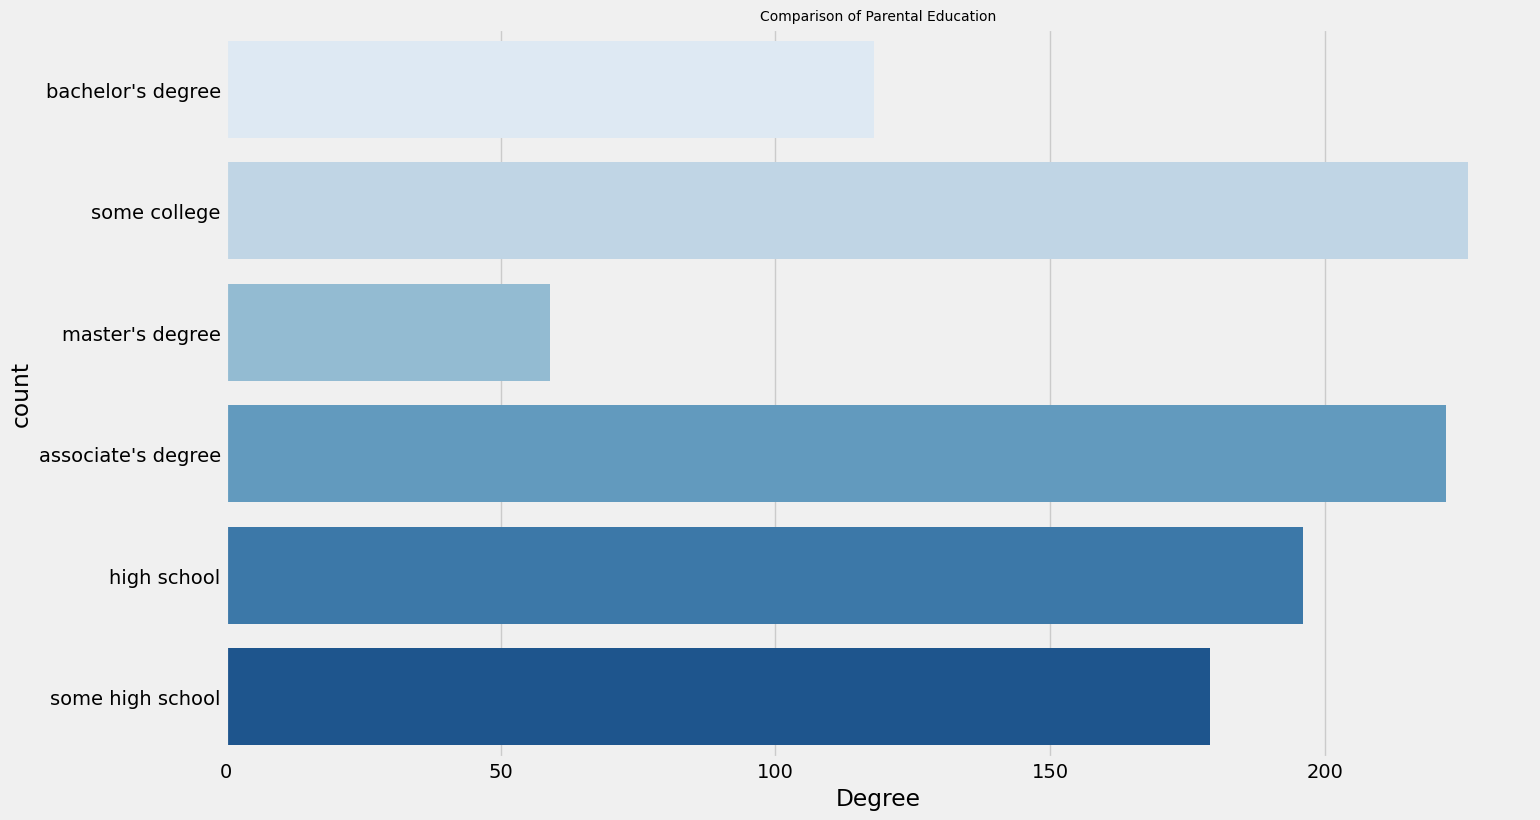

In [145]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 10, fontsize = 10)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

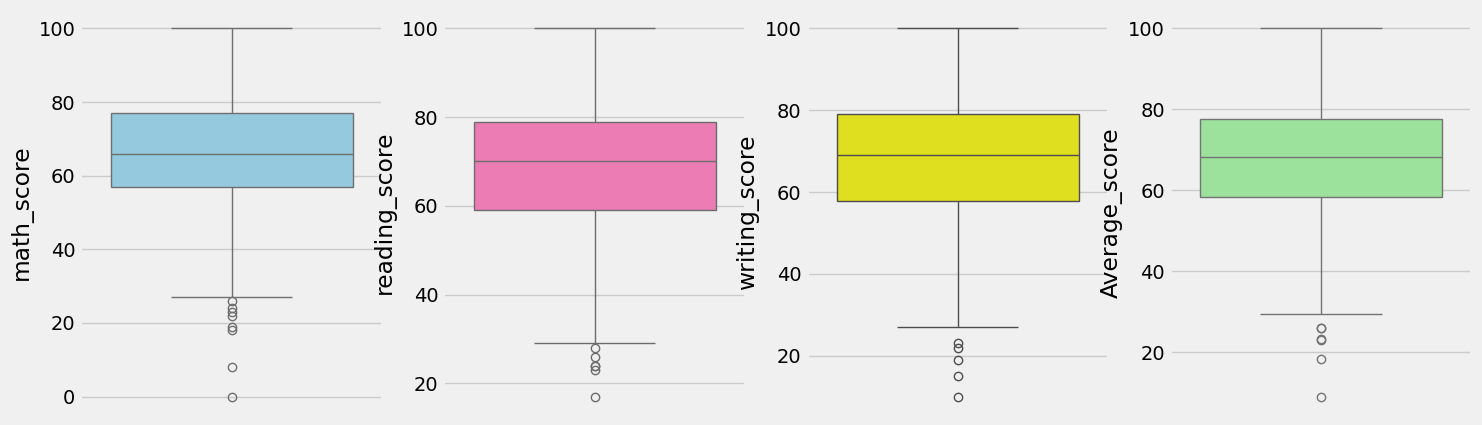

In [146]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

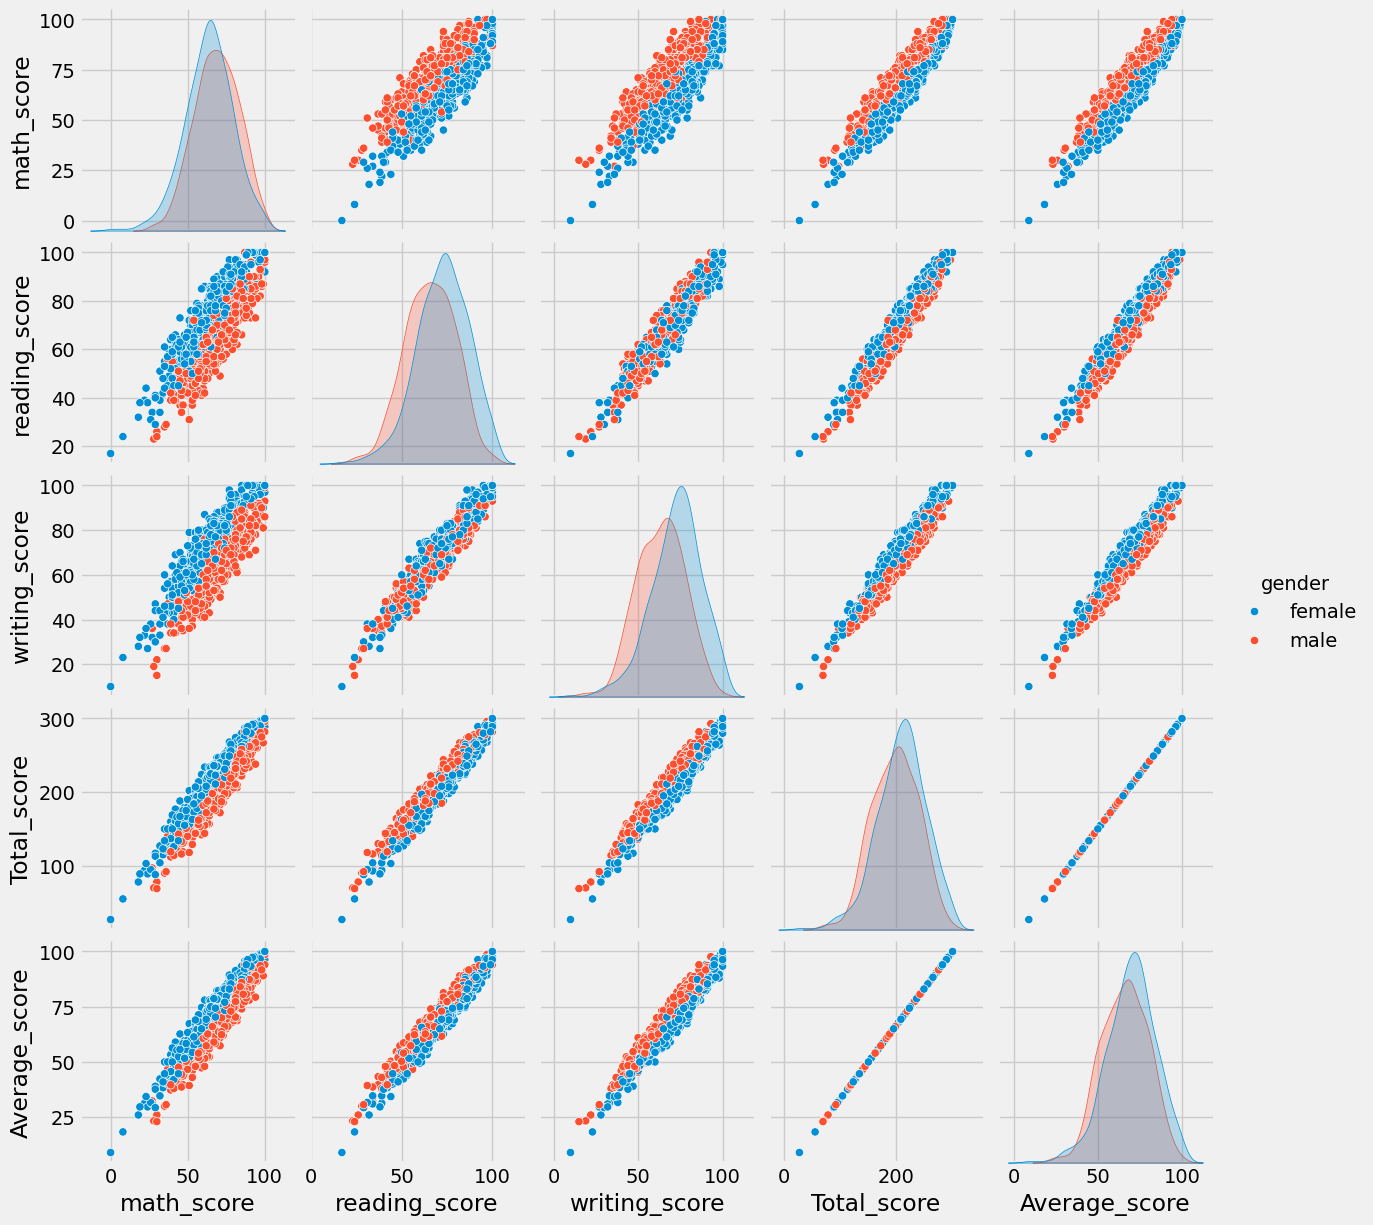

In [147]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [149]:
df.to_csv('cleaned.csv', index=False)